In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
train = 'cuaca-juli-2020.csv'
df = pd.read_csv(train,sep=';')

In [142]:
df

,Tanggal,Suhu
0,1,24.0
1,2,25.0
2,3,25.0
3,4,25.0
4,5,24.0
5,6,23.0
6,7,24.0
7,8,22.0
8,9,25.0
9,10,26.0


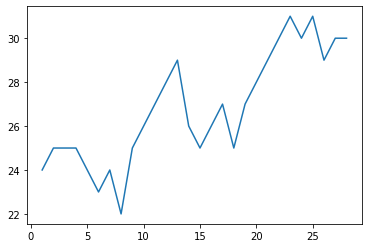

In [143]:
# col_names = ['tanggal', suhu]
x = df['Tanggal']
y = df['Suhu']
plt.plot(x, y)
# plt.legend('ABCDEF', ncol=2, loc='upper left');

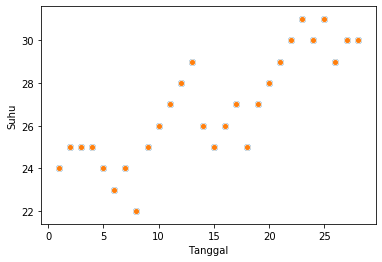

In [144]:
plt.scatter(x, y, marker='o')
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x,y,palette="Set2", sizes=(10, 200), data=df)

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X = df[:28]['Tanggal']
y = df[:28]['Suhu']

In [147]:
from sklearn.model_selection import train_test_split
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [148]:
X_train

4      5
14    15
22    23
20    21
8      9
18    19
0      1
10    11
26    27
27    28
24    25
13    14
5      6
25    26
16    17
12    13
23    24
3      4
2      3
17    18
6      7
11    12
Name: Tanggal, dtype: int64

In [149]:
from sklearn.linear_model import LinearRegression

# reshape the training 
X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1,1)
# instantiate the regressor class
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))

The Explained Variance: 0.58
The Mean Absolute Error: 1.26 degrees celsius
The Median Absolute Error: 1.24 degrees celsius


In [150]:
prediction

array([[25.24061413],
       [27.27779777],
       [28.8056855 ],
       [25.74991004],
       [23.7127264 ],
       [28.29638959]])

In [151]:
wantpredict = df[28:32]['Tanggal']
wantpredict = wantpredict.values.reshape(-1,1)
hasilpredict = regressor.predict(wantpredict)
hasilpredict

array([[30.58822118],
       [30.84286914],
       [31.09751709]])

In [154]:
dfpalsu = df
dfpalsu
k = 0
for i in range(28, 31):
    print(i) 
    dfpalsu['Suhu'][i] = hasilpredict[k]
    k = k+1
    print(k)
dfpalsu

28
1
29


/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2
30
3


,Tanggal,Suhu
0,1,24.000000
1,2,25.000000
2,3,25.000000
3,4,25.000000
4,5,24.000000
5,6,23.000000
6,7,24.000000
7,8,22.000000
8,9,25.000000
9,10,26.000000


# Done 

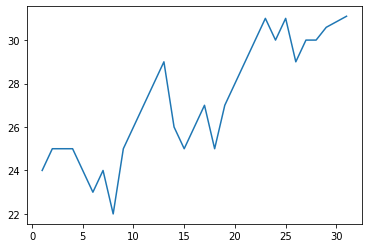

In [155]:
# col_names = ['tanggal', suhu]
x = dfpalsu['Tanggal']
y = dfpalsu['Suhu']
plt.plot(x, y)
# plt.legend('ABCDEF', ncol=2, loc='upper left');

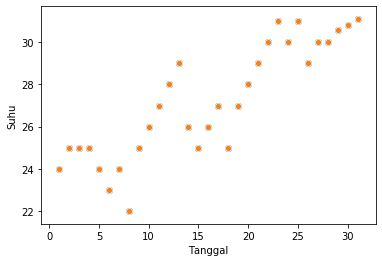

In [156]:
plt.scatter(x, y, marker='o')
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x,y,palette="Set2", sizes=(10, 200), data=df)